In [1]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import statistics

# Ensemble Model to Detect Fraudulent Doctors in Medicare

MENG Capstone Project
11 March 2020
Melvin Ang

In [2]:
df_dataset = pd.read_csv("Autoencoder 2017 Transformed Number of Services.csv")
df_dataset

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,1.003016e+09,SAWUSCH,MARK,R,M.D.,M,I,910 VIA DE LA PAZ STE 208,NaN,PACIFIC PALISADES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.003057e+09,KHEMICHIAN,ARBI,NaN,MD,M,I,21320 HAWTHORNE BLVD. #104,NaN,TORRANCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.003073e+09,ALASIL,TAREK,NaN,MD,M,I,100 E CALIFORNIA BLVD,NaN,PASADENA,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN
3,1.003102e+09,KIM,GRACE,L,MD,F,I,850 HEALTH SCIENCES RD,NaN,IRVINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.003808e+09,CHANG,ANDREW,NaN,M.D.,M,I,18350 ROSCOE BLVD,SUITE 101,NORTHRIDGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.003816e+09,ATMAJIAN,TIMOTHY,K,MD,M,I,3030 N FRESNO ST,SUITE 101,FRESNO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0
6,1.003818e+09,WANG,JENNIFER,P,MD,F,I,525 SOUTH DRIVE,SUITE 219,MOUNTAIN VIEW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.003819e+09,POULSEN,ERIC,J,M.D.,M,I,1360 E HERNDON AVE,STE 201,FRESNO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.003820e+09,SHEPARD,DANIEL,P,M.D.,M,I,910 E STOWELL RD,NaN,SANTA MARIA,...,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN
9,1.003820e+09,REMULLA,JUANCHO FRANCISCO,C,M.D.,M,I,16177 KAMANA RD,NaN,APPLE VALLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#create a table with all doctors. later fill in fraud score of each model to this table.
df_dataset_namesonly = df_dataset.drop(df_dataset.columns[3:],axis=1)
df_dataset_namesonly

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider
0,1.003016e+09,SAWUSCH,MARK
1,1.003057e+09,KHEMICHIAN,ARBI
2,1.003073e+09,ALASIL,TAREK
3,1.003102e+09,KIM,GRACE
4,1.003808e+09,CHANG,ANDREW
5,1.003816e+09,ATMAJIAN,TIMOTHY
6,1.003818e+09,WANG,JENNIFER
7,1.003819e+09,POULSEN,ERIC
8,1.003820e+09,SHEPARD,DANIEL
9,1.003820e+09,REMULLA,JUANCHO FRANCISCO


In [4]:
df = pd.read_csv("Autoencoder 2017 Dataset.csv")
df = df.fillna(0)

In [5]:
df.head(5)

,Fraud,0191T,0474T,10060,11000,11100,11440,11441,11642,11900,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Fraud distribution
df['Fraud'].value_counts()

0.0    1936
1.0      21
Name: Fraud, dtype: int64

In [7]:
#Fraud % in dataset
df['Fraud'].value_counts()[1]/(df['Fraud'].value_counts()[0]+df['Fraud'].value_counts()[1])*100

1.0730710270822688

In [8]:
#Consider 1000 non frauds doctor by random sampling
non_fraud = df[df['Fraud'] == 0].sample(1000)
fraud = df[df['Fraud'] == 1]
df2 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df2.drop(['Fraud'], axis = 1).values
Y = df2["Fraud"].values

In [9]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

# Data Visualization

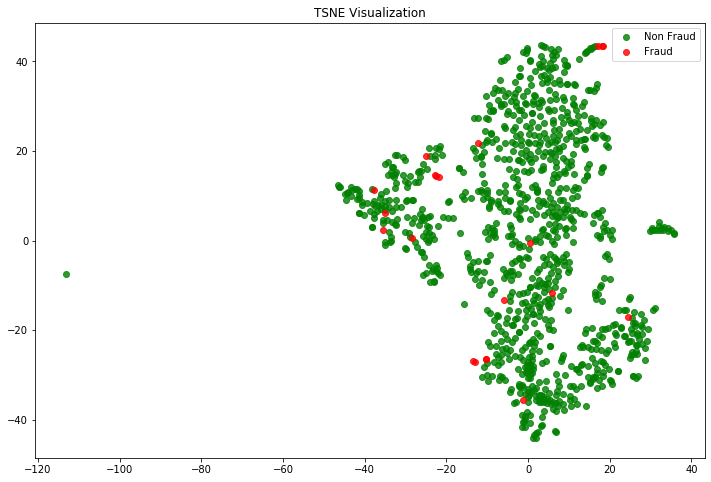

In [10]:
#Visualize the nature of fraud and non-fraud transactions using T-SNE
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.title("TSNE Visualization")
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [11]:
shape=(X.shape[1],)
shape

(367,)

In [12]:
# Autoencoder
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(30, activation='relu')(encoded)

## decoding part
decoded = Dense(30, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [13]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=keras.optimizers.SGD(lr=0.001), loss="binary_crossentropy")

In [14]:
#Min max scaling
x = df.drop(["Fraud"], axis=1)
y = df["Fraud"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [15]:
autoencoder.fit(x_norm[0:1936], x_norm[0:1936], 
                epochs = 20, 
                shuffle = True, validation_split = 0.20);

Train on 1548 samples, validate on 388 samples
Epoch 1/20
1548/1548 [==============================] - 1s 578us/sample - loss: 0.0464 - val_loss: 0.0469
Epoch 2/20
1548/1548 [==============================] - 0s 157us/sample - loss: 0.0430 - val_loss: 0.0439
Epoch 3/20
1548/1548 [==============================] - 0s 139us/sample - loss: 0.0409 - val_loss: 0.0417
Epoch 4/20
1548/1548 [==============================] - 0s 126us/sample - loss: 0.0385 - val_loss: 0.0392
Epoch 5/20
1548/1548 [==============================] - 0s 147us/sample - loss: 0.0372 - val_loss: 0.0383
Epoch 6/20
1548/1548 [==============================] - 0s 141us/sample - loss: 0.0365 - val_loss: 0.0376
Epoch 7/20
1548/1548 [==============================] - 0s 117us/sample - loss: 0.0359 - val_loss: 0.0369
Epoch 8/20
1548/1548 [==============================] - 0s 145us/sample - loss: 0.0354 - val_loss: 0.0363
Epoch 9/20
1548/1548 [==============================] - 0s 125us/sample - loss: 0.0349 - val_loss: 0.0359

In [16]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [17]:
norm_hid_rep = hidden_representation.predict(x_norm[:1936])
fraud_hid_rep = hidden_representation.predict(x_fraud)

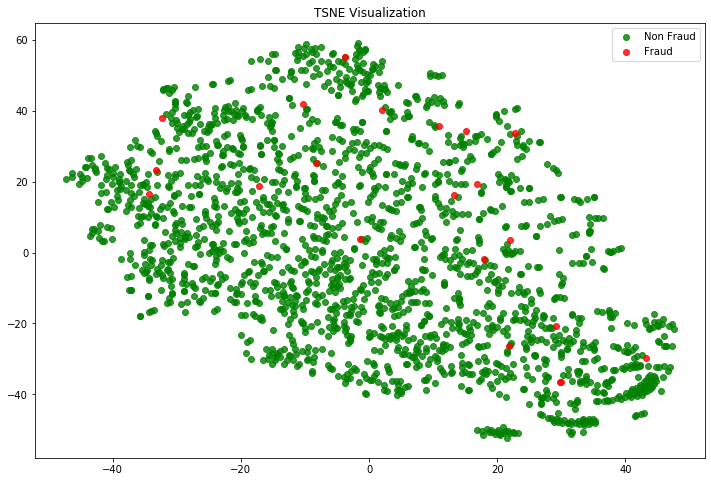

In [18]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

# Autoencoder Neural Network Model

In [19]:
#Normalized and scale
df_norm = df.copy()
df_norm.iloc[:,1:] = StandardScaler().fit_transform(df_norm.iloc[:,1:])

In [20]:
#Split test and train sets
train_x, test_x = train_test_split(df_norm, test_size=0.4, random_state=100)
train_x = train_x[train_x.Fraud == 0]       # extract normal transactions, as we only train NN on non-fraud cases
train_x = train_x.drop(['Fraud'], axis=1)   # drop the fraud column

test_y = test_x['Fraud']                    # save the fraud column for the test set
test_x = test_x.drop(['Fraud'], axis=1)     # drop the fraud column

train_x = train_x.values                    # transform df to ndarray
test_x = test_x.values                      # transform df to ndarray

In [21]:
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 367 different CPT codes
encoding_dim = 100
hidden_dim1 = 50 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 10
learning_rate = 1e-7

In [22]:
# This returns a tensor
input_layer = Input(shape=(input_dim, ))

# a layer instance is callable on a tensor, and returns a tensor
# Dense implements the operation: output = activation(dot(input, kernel) + bias), where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# activity_regularizer: Regularizer function applied to the output of the layer
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="relu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# This creates a model that includes
# the Input layer and four Dense layers
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [23]:
# Configure the learning process, by compiling the model
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')

# Saving the model
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                     save_best_only=True,
                     verbose=0)

# TensorBoard basic visualizations.
# This callback writes a log for TensorBoard, 
# which allows you to visualize dynamic graphs of your training and test metrics
tb = TensorBoard(log_dir='./logs',
                 histogram_freq=0,
                 write_graph=True,
                 write_images=True)

# Starts training
# autoencoder: same training(x) and target data(y)
# validation_data: tuple (x_val, y_val) on which 
# to evaluate the loss and any model metrics at the end of each epoch.

# History.history attribute is a record of training loss values 
# and metrics values at successive epochs.
history = autoencoder.fit(x=train_x, y=train_x,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(test_x, test_x),
                          verbose=1,
                          callbacks=[cp, tb]).history

Train on 1160 samples, validate on 783 samples
Epoch 1/100
1160/1160 [==============================] - 1s 680us/sample - loss: 1.1387 - accuracy: 8.6207e-04 - val_loss: 1.0371 - val_accuracy: 0.0038
Epoch 2/100
1160/1160 [==============================] - 0s 187us/sample - loss: 1.0893 - accuracy: 8.6207e-04 - val_loss: 0.9721 - val_accuracy: 0.0038
Epoch 3/100
1160/1160 [==============================] - 0s 151us/sample - loss: 1.0195 - accuracy: 8.6207e-04 - val_loss: 0.9083 - val_accuracy: 0.0000e+00
Epoch 4/100
1160/1160 [==============================] - 0s 131us/sample - loss: 0.9609 - accuracy: 0.0000e+00 - val_loss: 0.8639 - val_accuracy: 0.0000e+00
Epoch 5/100
1160/1160 [==============================] - 0s 128us/sample - loss: 0.9249 - accuracy: 0.0000e+00 - val_loss: 0.8404 - val_accuracy: 0.0000e+00
Epoch 6/100
1160/1160 [==============================] - 0s 121us/sample - loss: 0.9065 - accuracy: 0.0000e+00 - val_loss: 0.8291 - val_accuracy: 0.0000e+00
Epoch 7/100
1160/11

Epoch 55/100
1160/1160 [==============================] - 0s 174us/sample - loss: 0.8568 - accuracy: 0.0095 - val_loss: 0.8065 - val_accuracy: 0.0077
Epoch 56/100
1160/1160 [==============================] - 0s 140us/sample - loss: 0.8563 - accuracy: 0.0103 - val_loss: 0.8060 - val_accuracy: 0.0077
Epoch 57/100
1160/1160 [==============================] - 0s 99us/sample - loss: 0.8559 - accuracy: 0.0112 - val_loss: 0.8063 - val_accuracy: 0.0089
Epoch 58/100
1160/1160 [==============================] - 0s 117us/sample - loss: 0.8557 - accuracy: 0.0138 - val_loss: 0.8051 - val_accuracy: 0.0102
Epoch 59/100
1160/1160 [==============================] - 0s 68us/sample - loss: 0.8553 - accuracy: 0.0155 - val_loss: 0.8053 - val_accuracy: 0.0115
Epoch 60/100
1160/1160 [==============================] - 0s 126us/sample - loss: 0.8549 - accuracy: 0.0155 - val_loss: 0.8046 - val_accuracy: 0.0089
Epoch 61/100
1160/1160 [==============================] - 0s 120us/sample - loss: 0.8543 - accuracy: 0

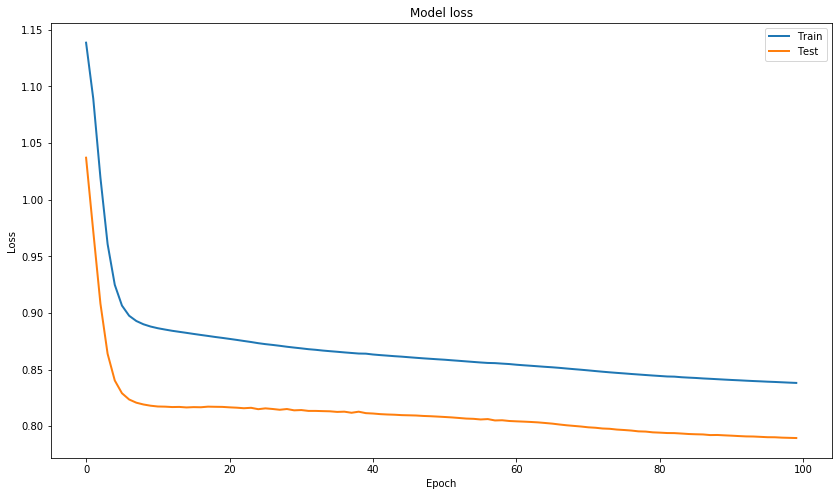

In [24]:
plt.figure(figsize=(14, 8))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [25]:
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

,Reconstruction_error,True_class
count,783.000000,783.000000
mean,0.789558,0.008940
std,2.491384,0.094188
min,0.009948,0.000000
25%,0.018265,0.000000
50%,0.044869,0.000000
75%,0.275187,0.000000
max,35.014076,1.000000


In [26]:
#Check reconstruction errors
reconstruction_error_list = error_df.sort_values(['Reconstruction_error', 'True_class'], ascending=[0, 1])
reconstruction_error_list

,Reconstruction_error,True_class
1949,35.014076,1.0
1092,22.339327,0.0
1778,19.101601,0.0
223,17.146935,0.0
1598,16.968431,0.0
702,16.533375,0.0
1662,12.834270,0.0
1415,11.628386,0.0
1017,11.012159,1.0
244,10.792517,0.0


In [27]:
test_y

1135    0.0
75      0.0
264     0.0
565     0.0
805     0.0
808     0.0
354     0.0
1296    0.0
538     0.0
983     0.0
1133    0.0
492     0.0
1318    0.0
647     0.0
355     0.0
837     0.0
832     0.0
23      0.0
1941    0.0
1641    0.0
336     0.0
1250    0.0
1908    0.0
1856    0.0
913     0.0
903     0.0
27      0.0
1056    0.0
408     0.0
1808    0.0
       ... 
90      0.0
1790    0.0
308     0.0
221     0.0
1917    0.0
964     0.0
747     0.0
1540    0.0
66      0.0
886     0.0
1504    0.0
857     0.0
636     0.0
919     0.0
1697    0.0
713     0.0
1171    0.0
1659    0.0
1580    0.0
1694    0.0
984     0.0
1344    0.0
1325    0.0
1240    0.0
69      0.0
431     0.0
916     0.0
229     0.0
1272    0.0
1391    0.0
Name: Fraud, Length: 783, dtype: float64

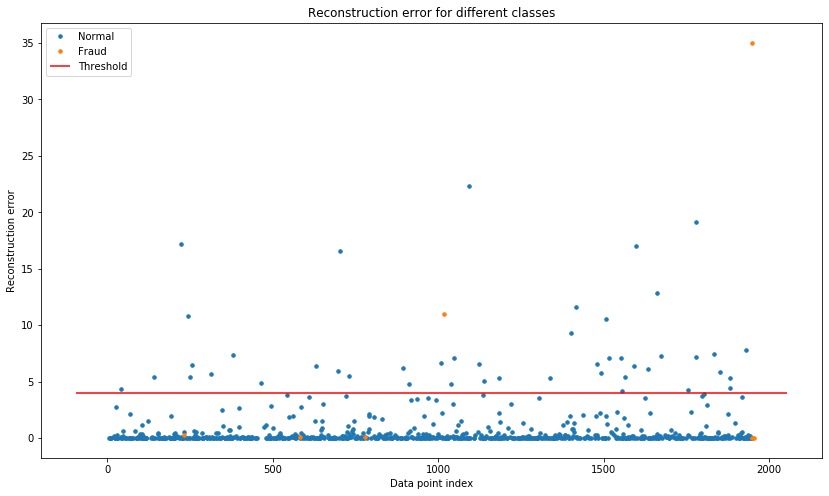

In [28]:
threshold_fixed = 4
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

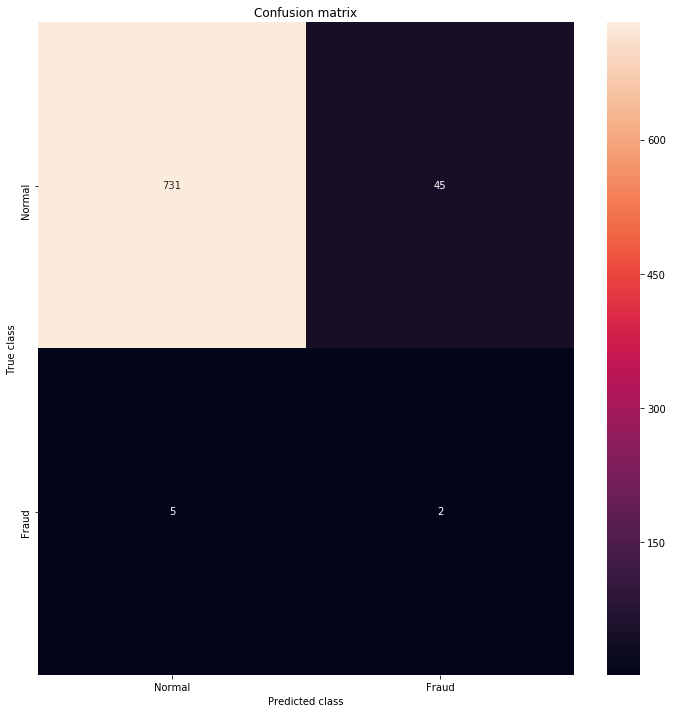

In [29]:
# As with autoencoders, it is the assumption that fraud or anomalies will suffer 
# from a detectably high reconstruction error, predicting class as 1 (Fraud)
# if reconstruction error is greater than threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
LABELS = ["Normal","Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [30]:
autoencoder_df_fraudscore = reconstruction_error_list[0:int(len(reconstruction_error_list)*0.05)].iloc[:,[]] #.reset_index() 
autoencoder_df_fraudscore["Autoencoder Fraud Score"] = 1
autoencoder_df_fraudscore

,Autoencoder Fraud Score
1949,1
1092,1
1778,1
223,1
1598,1
702,1
1662,1
1415,1
1017,1
244,1


In [62]:
#Add autoencoder fraud score to the fraud score table
#df_2017dataset.merge(autoencoder_df_fraudscore, left_index=True, right_index=True)
df_fraudscore_table = pd.concat([df_dataset_namesonly, autoencoder_df_fraudscore], axis=1, sort=False)
df_fraudscore_table

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Autoencoder Fraud Score
0,1.003016e+09,SAWUSCH,MARK,NaN
1,1.003057e+09,KHEMICHIAN,ARBI,NaN
2,1.003073e+09,ALASIL,TAREK,NaN
3,1.003102e+09,KIM,GRACE,NaN
4,1.003808e+09,CHANG,ANDREW,NaN
5,1.003816e+09,ATMAJIAN,TIMOTHY,NaN
6,1.003818e+09,WANG,JENNIFER,NaN
7,1.003819e+09,POULSEN,ERIC,NaN
8,1.003820e+09,SHEPARD,DANIEL,NaN
9,1.003820e+09,REMULLA,JUANCHO FRANCISCO,NaN


# K-means Clustering Model

In [32]:
df_dataset_clustering = df_dataset.drop(df_dataset.columns[0:13],axis=1)
df_dataset_clustering = df_dataset_clustering.fillna(0)
df_dataset_clustering

,0191T,0474T,10060,11000,11100,11440,11441,11642,11900,13160,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# finding the best number of clusters
K = range(1,15)
sum_of_squared_distances = []
for k in K: 
    kmeans = KMeans(n_clusters=k).fit(df_dataset_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

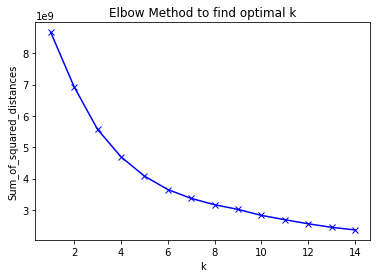

In [34]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method to find optimal k')
plt.show()

In [35]:
k_param = 6
kmeans = KMeans(n_clusters=k_param)
kmeansEntireSet = kmeans.fit(df_dataset_clustering)
cluster_member = kmeans.labels_
print("Number of unique cluster members:{}".format(len(kmeans.labels_)))
print("Cluster centers:\n{}".format(kmeans.cluster_centers_))
print("Cluster membership:\n{}".format(kmeans.labels_))
print("Kmeans iterations:\n{}".format(kmeans.n_iter_))
print("Sum of squared distances:\n{}".format(kmeans.inertia_))

Number of unique cluster members:1957
Cluster centers:
[[ 8.76549865e+00  4.39353100e-01  7.54716981e-02 ...  9.43396226e-01
   6.19946092e-02  8.60422844e-16]
 [ 4.19847328e-01 -3.19189120e-16  1.60305344e-01 ...  6.10622664e-16
  -5.55111512e-17 -1.52655666e-16]
 [ 7.50354610e-01  2.05673759e-02  1.77304965e-02 ...  1.29078014e-01
   3.04964539e-02  1.68794326e-01]
 [ 4.44089210e-16  0.00000000e+00 -1.38777878e-17 ...  3.52631579e+00
   1.38777878e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.44089210e-16  0.00000000e+00 -2.08166817e-17 ...  1.11022302e-16
   2.08166817e-17 -2.77555756e-17]]
Cluster membership:
[2 2 2 ... 2 2 2]
Kmeans iterations:
17
Sum of squared distances:
3652879286.9164906


In [36]:
#See full result of kmeans clusters
np.set_printoptions(threshold=sys.maxsize)
cluster_member

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 3, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,

In [37]:
#How many doctors in each cluster
print("Number of doctors in cluster 0:{}".format(np.sum(cluster_member == 0)))
print("Number of doctors in cluster 1:{}".format(np.sum(cluster_member == 1)))
print("Number of doctors in cluster 2:{}".format(np.sum(cluster_member == 2)))
print("Number of doctors in cluster 3:{}".format(np.sum(cluster_member == 3)))
print("Number of doctors in cluster 4:{}".format(np.sum(cluster_member == 4)))
print("Number of doctors in cluster 5:{}".format(np.sum(cluster_member == 5)))
print("Number of doctors in cluster 6:{}".format(np.sum(cluster_member == 6)))
print("Number of doctors in cluster 7:{}".format(np.sum(cluster_member == 7)))

Number of doctors in cluster 0:371
Number of doctors in cluster 1:131
Number of doctors in cluster 2:1410
Number of doctors in cluster 3:19
Number of doctors in cluster 4:3
Number of doctors in cluster 5:23
Number of doctors in cluster 6:0
Number of doctors in cluster 7:0


In [45]:
#See who are the doctors in the cluster
np.where(cluster_member == 4) 

(array([ 248,  543, 1017]),)

In [41]:
clustersize = []
for i in range(k_param):
    clustersize.append(np.sum(cluster_member == i))
#get the smallest cluster group and its index in the list
val, idx = min((val, idx) for (idx, val) in enumerate(clustersize))
val, idx

(3, 4)

In [48]:
#get names of doctor that are in the smallest cluster
doctors_index_in_smallest_cluster = []
for i in range(val):
    doctors_index_in_smallest_cluster.append(np.where(cluster_member == idx)[0][i])
doctors_index_in_smallest_cluster

[248, 543, 1017]

In [63]:
#create a new column for k-means clustering fraud score
df_fraudscore_table = df_fraudscore_table.fillna(0)
df_fraudscore_table["k-means Clustering Fraud Score"] = 0

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Autoencoder Fraud Score,k-means Clustering Fraud Score
0,1.003016e+09,SAWUSCH,MARK,0.0,0
1,1.003057e+09,KHEMICHIAN,ARBI,0.0,0
2,1.003073e+09,ALASIL,TAREK,0.0,0
3,1.003102e+09,KIM,GRACE,0.0,0
4,1.003808e+09,CHANG,ANDREW,0.0,0
5,1.003816e+09,ATMAJIAN,TIMOTHY,0.0,0
6,1.003818e+09,WANG,JENNIFER,0.0,0
7,1.003819e+09,POULSEN,ERIC,0.0,0
8,1.003820e+09,SHEPARD,DANIEL,0.0,0
9,1.003820e+09,REMULLA,JUANCHO FRANCISCO,0.0,0


In [64]:
#set fraud score to 1 for doctors in smallest cluster
for i in doctors_index_in_smallest_cluster:
    df_fraudscore_table.at[i,"k-means Clustering Fraud Score"] = 1
df_fraudscore_table

# DBSCAN Model

In [54]:
df_dataset_drop = df_dataset.drop(df_dataset.columns[0:13],axis=1)
df_dataset_drop = df_dataset_drop.fillna(0)
df_dataset_drop

,0191T,0474T,10060,11000,11100,11440,11441,11642,11900,13160,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_dataset_drop) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [56]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 

In [57]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.05, min_samples = 3).fit(X_principal)  # 15 ，6 
labels = db_default.labels_ 

In [58]:
print("Number of doctors in cluster -1 (outlier):{}".format(np.sum(labels == -1)))
print("Number of doctors in cluster 0 (normal):{}".format(np.sum(labels == 0)))

Number of doctors in cluster -1 (outlier):36
Number of doctors in cluster 0 (normal):1715


In [86]:
#See which doctors are considered fraudulent from DB Scan
DBScan_fraud_doctors_index = np.where(labels == -1)
pd.DataFrame(df_dataset_namesonly, index=np.where(labels == -1)[0])

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider
30,1.013145e+09,LIU,JEFFREY
113,1.043531e+09,TSAI,FRANK
119,1.053338e+09,MCGREW,DAVID
120,1.053351e+09,LANGELL,CHRISTINE
231,1.114914e+09,TRENT,ROBERT
341,1.174526e+09,SCHWARTZ,LEE
344,1.174554e+09,BAHADUR,GAVIN
401,1.205855e+09,VALDEZ,JULIA
447,1.225181e+09,FECHTER,BRIAN
461,1.235157e+09,URREA,PAUL


In [80]:
#create a new column for DBScan fraud score
df_fraudscore_table["DBScan Fraud Score"] = 0
#set fraud score to 1 for doctors in fraud cluster
for i in range(len(DBScan_fraud_doctors_index[0])):
    #print(DBScan_fraud_doctors_index[0][i])
    df_fraudscore_table.at[DBScan_fraud_doctors_index[0][i],"DBScan Fraud Score"] = 1

df_fraudscore_table

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Autoencoder Fraud Score,k-means Clustering Fraud Score,DBScan Fraud Score
0,1.003016e+09,SAWUSCH,MARK,0.0,0,0
1,1.003057e+09,KHEMICHIAN,ARBI,0.0,0,0
2,1.003073e+09,ALASIL,TAREK,0.0,0,0
3,1.003102e+09,KIM,GRACE,0.0,0,0
4,1.003808e+09,CHANG,ANDREW,0.0,0,0
5,1.003816e+09,ATMAJIAN,TIMOTHY,0.0,0,0
6,1.003818e+09,WANG,JENNIFER,0.0,0,0
7,1.003819e+09,POULSEN,ERIC,0.0,0,0
8,1.003820e+09,SHEPARD,DANIEL,0.0,0,0
9,1.003820e+09,REMULLA,JUANCHO FRANCISCO,0.0,0,0


# National Ratios Model

Data file is downloaded from CMS, filtered by the desired CPT codes and applied for entire USA to obtain the national ratio of the respective CPT codes.

In [ ]:
df_nationalratio = pd.read_csv("2017_92012_92014_92002_92004.csv")
df_nationalratio

In [ ]:
df_nationalratio.describe()

In [ ]:
df_nationalratio['Number of Services'] = pd.to_numeric(df_nationalratio['Number of Services'],errors='coerce')
df_nationalratio.dtypes

In [ ]:
#Create pivot table
df_pivot = df_nationalratio.pivot_table(index='National Provider Identifier', columns='HCPCS Code', values='Number of Services', aggfunc='sum')
df_pivot.fillna(0, inplace=True)
df_pivot

In [ ]:
df_pivot.iloc[:,0:1][:1]
#df_pivot["test"] = df_pivot[cpt_codes[i]]/(df_pivot[cpt_codes[i]]+df_pivot[cpt_codes[i+1]])

In [ ]:
#Get column names (CPT CODES)
unique_cpt_groups = 2
cpt_codes = list(df_pivot.columns)
cpt_codes

In [ ]:
for i in range(unique_cpt_groups):
    cpt_codes[-1+i:i*2]

In [ ]:
cpt_codes[2:4]

In [ ]:
cpt_codes[1]

In [ ]:
#Calculate ratios
for i in range(len(cpt_codes)):
    print(i)
    print(cpt_codes[i])
    print(cpt_codes[i+1])
    #df_pivot[cpt_codes[i]] = df_pivot[cpt_codes[i]]/(df_pivot[cpt_codes[i]]+df_pivot[cpt_codes[i+1]])
    
df_pivot

# Output Final Fraud Score Table

In [87]:
df_fraudscore_table["Total Fraud Score"] = df_fraudscore_table["Autoencoder Fraud Score"]+df_fraudscore_table["k-means Clustering Fraud Score"]++df_fraudscore_table["DBScan Fraud Score"]
df_fraudscore_table.sort_values(by=['Total Fraud Score'],ascending=False)


,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Autoencoder Fraud Score,k-means Clustering Fraud Score,DBScan Fraud Score,Total Fraud Score
1017,1.528055e+09,NANDURI,PADMA,1.0,1,0,2.0
1122,1.578651e+09,WRIGHT,KENNETH,1.0,0,0,1.0
1591,1.821189e+09,DOVICH,JESSE,1.0,0,0,1.0
808,1.417046e+09,GHOSH,TANYA,0.0,0,1,1.0
1092,1.568478e+09,BURNSTINE,MICHAEL,1.0,0,0,1.0
1089,1.568453e+09,CHANDRAMOHAN,SHANMUGANATHAN,0.0,0,1,1.0
1541,1.801802e+09,PEABODY,ROBERT,0.0,0,1,1.0
344,1.174554e+09,BAHADUR,GAVIN,0.0,0,1,1.0
1182,1.609891e+09,CASEY,RICHARD,1.0,0,0,1.0
341,1.174526e+09,SCHWARTZ,LEE,0.0,0,1,1.0


# END

In [92]:
df_fraudscore_table.sort_values(by=['Autoencoder Fraud Score'],ascending=False)

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Autoencoder Fraud Score,k-means Clustering Fraud Score,DBScan Fraud Score,Total Fraud Score
142,1.063639e+09,COURIS,MICHAEL,1.0,0,0,1.0
1092,1.568478e+09,BURNSTINE,MICHAEL,1.0,0,0,1.0
1929,1.992720e+09,SONG,ALICE,1.0,0,0,1.0
1779,1.912972e+09,SHORR,NORMAN,1.0,0,0,1.0
892,1.467488e+09,DAVIDSON,JOSEPH,1.0,0,0,1.0
1048,1.538356e+09,"SILVERMAN,",JAY,1.0,0,0,1.0
1182,1.609891e+09,CASEY,RICHARD,1.0,0,0,1.0
1674,1.861694e+09,GRAND,ALEXANDER,1.0,0,0,1.0
1017,1.528055e+09,NANDURI,PADMA,1.0,1,0,2.0
312,1.154439e+09,STORKERSEN,KRIS,1.0,0,0,1.0
